Epoch 1/20
45/45 [==============================] - 0s 3ms/step - loss: 2.1441 - accuracy: 0.3013 - val_loss: 1.7999 - val_accuracy: 0.7139
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 1.2977 - accuracy: 0.6576 - val_loss: 0.6230 - val_accuracy: 0.9000
Epoch 3/20
45/45 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.8045 - val_loss: 0.2760 - val_accuracy: 0.9389
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8831 - val_loss: 0.1917 - val_accuracy: 0.9667
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.9207 - val_loss: 0.1223 - val_accuracy: 0.9778
Epoch 6/20
45/45 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9381 - val_loss: 0.0996 - val_accuracy: 0.9778
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9485 - val_loss: 0.1063 - val_accuracy: 0.9778
Epoch 8/20
45/45 [==

1/1 [==============================] - 0s 33ms/step


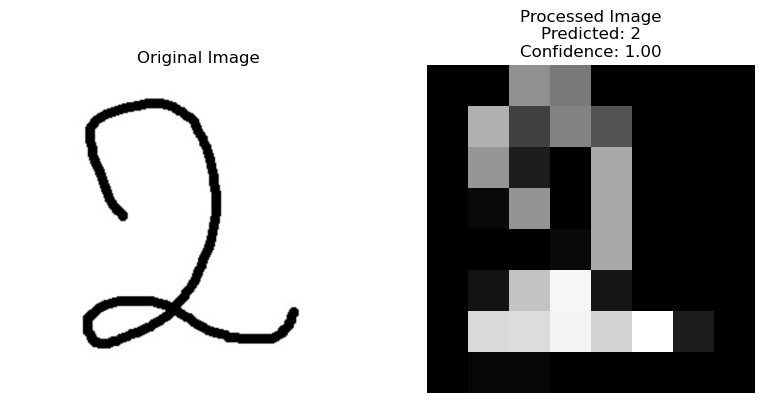

In [20]:
import numpy as np
from sklearn.datasets import load_digits
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # Keep as digits 0-9 instead of converting to letters

# Reshape data to match image format
X = X.reshape(-1, 8, 8, 1)
X = X.astype('float32') / 16.0

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train, 10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, 10)

def create_model(input_shape=(8, 8, 1), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

def predict_digit(image):
    # Ensure image is in the correct format
    image = np.expand_dims(image, axis=0)
    
    # Make prediction
    prediction = model.predict(image)
    digit = np.argmax(prediction)
    confidence = prediction[0][digit]
    
    return digit, confidence

def preprocess_image(image_path):
    """
    Preprocess a custom image to match the format of training data
    """
    # Read image
    if isinstance(image_path, str):
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        img = image_path
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize to 8x8
    img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA)
    
    # Invert if needed (assuming white text on black background)
    if np.mean(img) > 127:
        img = 255 - img
    
    # Normalize
    img = img.astype('float32') / 255.0 * 16.0
    
    # Reshape for model
    img = img.reshape(8, 8, 1)
    
    return img

def test_custom_image(image_path, model):
    """
    Test a custom image and display results
    """
    # Preprocess image
    processed_img = preprocess_image(image_path)
    
    # Get prediction
    predicted_digit, confidence = predict_digit(processed_img)
    
    # Display results
    plt.figure(figsize=(8, 4))
    
    # Original image
    plt.subplot(1, 2, 1)
    if isinstance(image_path, str):
        orig_img = plt.imread(image_path)
        plt.imshow(orig_img, cmap='gray' if len(orig_img.shape) == 2 else None)
    else:
        plt.imshow(image_path, cmap='gray' if len(image_path.shape) == 2 else None)
    plt.title('Original Image')
    plt.axis('off')
    
    # Processed image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_img.reshape(8, 8), cmap='gray')
    plt.title(f'Processed Image\nPredicted: {predicted_digit}\nConfidence: {confidence:.2f}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Create and train model
model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test_encoded))
test_custom_image('/Users/saideepikaneeluru/Desktop/test.png', model)